In [27]:
# Import Statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import hvplot.pandas

In [28]:
# Create dataframe from csv
global_temp = "Resources/Global_annual_mean_temp.csv"
sea_level = "Resources/sea-levels-news-updated-years.csv"
emissions = "Resources/annual-co-emissions-by-region.csv"

sea_level_df = pd.read_csv(sea_level)
global_temp_df = pd.read_csv(global_temp)
emissions_df = pd.read_csv(emissions)

In [29]:
global_temp_df.head()

,Year,No_Smoothing,Lowess(5)
0,1880,-0.17,-0.10
1,1881,-0.09,-0.13
2,1882,-0.11,-0.17
3,1883,-0.18,-0.20
4,1884,-0.28,-0.24


In [30]:
sea_level_df.head()

,country,Day,Global sea level according to Church and White (2011),Global sea level as an average of Church and White (2011) and UHSLC data
0,World,1880-04-15,-183.31406,-183.31406
1,World,1880-07-15,-183.24739,-183.24739
2,World,1880-10-15,-174.14740,-174.14740
3,World,1881-01-15,-159.68073,-159.68073
4,World,1881-04-15,-172.41406,-172.41406


In [31]:
emissions_df.head()

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [32]:
annual_emissions = emissions_df.groupby('Year')['Annual CO₂ emissions'].mean()
annual_emissions

Year
1750    3.988259e+06
1751    4.031670e+06
1752    4.073643e+06
1753    4.118781e+06
1754    4.171534e+06
            ...     
2019    9.587280e+08
2020    9.118395e+08
2021    9.606144e+08
2022    9.658950e+08
2023    9.745819e+08
Name: Annual CO₂ emissions, Length: 274, dtype: float64

In [33]:
annual_emissions_df = pd.DataFrame(annual_emissions).reset_index()
annual_emissions_df.head()

,Year,Annual CO₂ emissions
0,1750,3.988259e+06
1,1751,4.031670e+06
2,1752,4.073643e+06
3,1753,4.118781e+06
4,1754,4.171534e+06


In [34]:
annual_emissions_df.tail()

,Year,Annual CO₂ emissions
269,2019,9.587280e+08
270,2020,9.118395e+08
271,2021,9.606144e+08
272,2022,9.658950e+08
273,2023,9.745819e+08


In [35]:
# Filter the DataFrame for years between 1880 and 2020 (inclusive)
annual_emissions_filtered_df = annual_emissions_df[(annual_emissions_df['Year'] >= 1880) & (annual_emissions_df['Year'] <= 2020)]

# Display the filtered DataFrame
annual_emissions_filtered_df.head()

,Year,Annual CO₂ emissions
130,1880,7.576504e+07
131,1881,7.737324e+07
132,1882,8.234954e+07
133,1883,8.646384e+07
134,1884,8.620208e+07


In [36]:
annual_emissions_filtered_df.tail()

,Year,Annual CO₂ emissions
266,2016,9.190729e+08
267,2017,9.333712e+08
268,2018,9.510966e+08
269,2019,9.587280e+08
270,2020,9.118395e+08


In [37]:
# Average Year values together to create one single year value per row
sea_level_df["Day"] = pd.to_datetime(sea_level_df["Day"])

sea_level_df["Year"] = sea_level_df["Day"].dt.year

avg_df = sea_level_df.groupby("Year")["Global sea level according to Church and White (2011)"].mean()
avg_df.head(10)

Year
1880   -180.236283
1881   -173.039065
1882   -191.580733
1883   -190.455727
1884   -166.597397
1885   -168.555730
1886   -169.597397
1887   -176.764062
1888   -174.155728
1889   -171.480732
Name: Global sea level according to Church and White (2011), dtype: float64

In [38]:
# Check number of unique year values for global temps
global_temp_df["Year"].unique().size

144

In [39]:
# Check number of unique year values for sea levels
avg_df.unique().size

141

In [40]:
# Check unique year values for sea levels
avg_df.index.unique()

Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
       ...
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype='int32', name='Year', length=141)

In [41]:
# Check unique year values for global temps
global_temp_df["Year"].unique()

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023], dtype=int64)

In [42]:
# Merge two df's on Year using inner to remove last 3 years from global temp df
sea_level_temp_df = pd.merge(avg_df, global_temp_df, on="Year", how="inner")

# Rename columns and drop extraneous column
sea_level_temp_df.rename(columns={'Global sea level according to Church and White (2011)': 'Global Sea Level Change', 'No_Smoothing': 'Global Temperature Change'}, inplace=True)
sea_level_temp_df.drop(columns=['Lowess(5)'], inplace=True)

# Check first 5 rows in new df
sea_level_temp_df.head()

,Year,Global Sea Level Change,Global Temperature Change
0,1880,-180.236283,-0.17
1,1881,-173.039065,-0.09
2,1882,-191.580733,-0.11
3,1883,-190.455727,-0.18
4,1884,-166.597397,-0.28


In [43]:
# Check last 5 rows in new df
sea_level_temp_df.tail()

,Year,Global Sea Level Change,Global Temperature Change
136,2016,56.330711,1.01
137,2017,55.112391,0.92
138,2018,52.083274,0.85
139,2019,60.980738,0.98
140,2020,65.999739,1.02


In [44]:
sea_temp_emissions_df = pd.merge(annual_emissions_filtered_df, sea_level_temp_df, on='Year', how='inner')

# Display the merged DataFrame
sea_temp_emissions_df.head()

,Year,Annual CO₂ emissions,Global Sea Level Change,Global Temperature Change
0,1880,7.576504e+07,-180.236283,-0.17
1,1881,7.737324e+07,-173.039065,-0.09
2,1882,8.234954e+07,-191.580733,-0.11
3,1883,8.646384e+07,-190.455727,-0.18
4,1884,8.620208e+07,-166.597397,-0.28


In [45]:
sea_temp_emissions_df.tail()

,Year,Annual CO₂ emissions,Global Sea Level Change,Global Temperature Change
136,2016,9.190729e+08,56.330711,1.01
137,2017,9.333712e+08,55.112391,0.92
138,2018,9.510966e+08,52.083274,0.85
139,2019,9.587280e+08,60.980738,0.98
140,2020,9.118395e+08,65.999739,1.02


<function matplotlib.pyplot.show(close=None, block=None)>

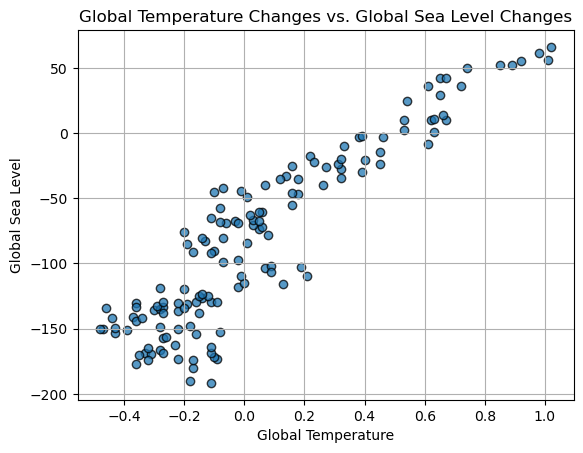

In [72]:
#scatter plot for sea level change vs. global temperatures
plt.scatter(sea_temp_emissions_df['Global Temperature Change'], sea_temp_emissions_df['Global Sea Level Change'], edgecolor='black', alpha=0.75)

#graph properties
plt.title("Global Temperature Changes vs. Global Sea Level Changes")
plt.xlabel("Global Temperature")
plt.ylabel("Global Sea Level")
plt.grid()

#save figure
plt.savefig("output_data/Fig3.png")

plt.show

In [47]:
#define function to create linear regression
def linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values, line_eq, rvalue

The r^2 value is : 0.8299105724331509


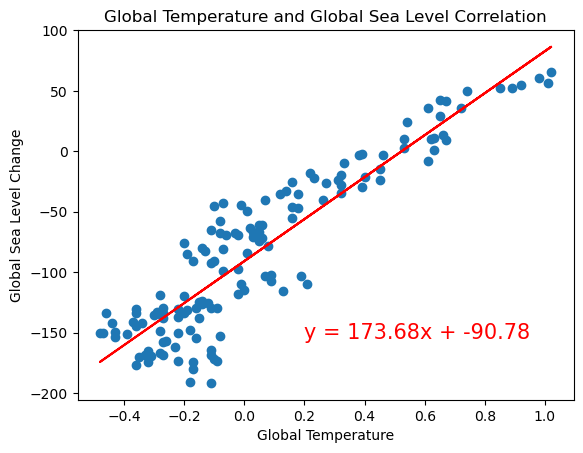

In [76]:
#lineral regression
x_values = sea_temp_emissions_df["Global Temperature Change"]
y_values = sea_temp_emissions_df["Global Sea Level Change"]

plt.scatter(x_values, y_values)

regress_values, line_eq, rvalue = linear_regression(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(0.2, -155),fontsize=15,color='red')
plt.title("Global Temperature and Global Sea Level Correlation")
plt.xlabel('Global Temperature')
plt.ylabel('Global Sea Level Change')

print(f"The r^2 value is : {rvalue**2}")

#save figure
plt.savefig("output_data/Fig4.png")

plt.show()

In [ ]:
#line graph pf global emissions over time

<function matplotlib.pyplot.show(close=None, block=None)>

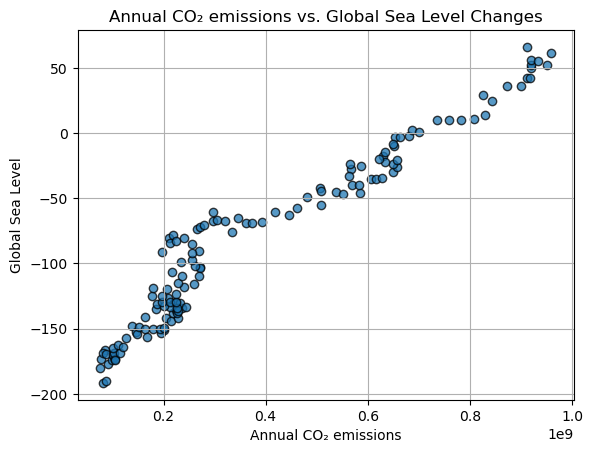

In [78]:
#scatter plot for sea level change vs. global temperatures
plt.scatter(sea_temp_emissions_df['Annual CO₂ emissions'], sea_temp_emissions_df['Global Sea Level Change'], edgecolor='black', alpha=0.75)

#graph properties
plt.title("Annual CO₂ emissions vs. Global Sea Level Changes")
plt.xlabel("Annual CO₂ emissions")
plt.ylabel("Global Sea Level")
plt.grid()

#save figure
plt.savefig("output_data/Fig6.png")

plt.show

The r^2 value is : 0.9358351298127265


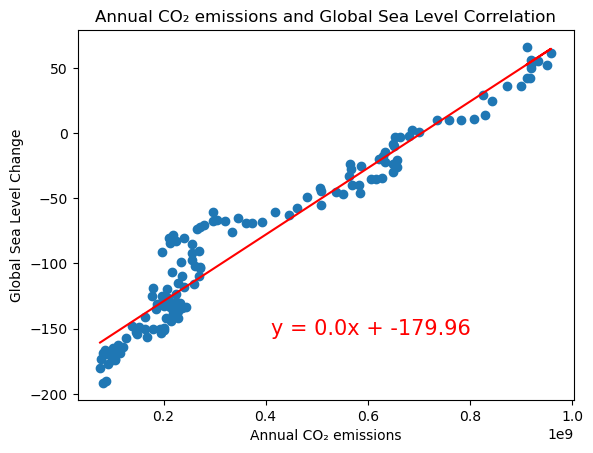

In [96]:
#lineral regression
x_values = sea_temp_emissions_df["Annual CO₂ emissions"]
y_values = sea_temp_emissions_df["Global Sea Level Change"]

plt.scatter(x_values, y_values)

regress_values, line_eq, rvalue = linear_regression(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(0.41e9, -155),fontsize=15,color='red')
plt.title("Annual CO₂ emissions and Global Sea Level Correlation")
plt.xlabel('Annual CO₂ emissions')
plt.ylabel('Global Sea Level Change')

print(f"The r^2 value is : {rvalue**2}")

#save figure
plt.savefig("output_data/Fig7.png")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

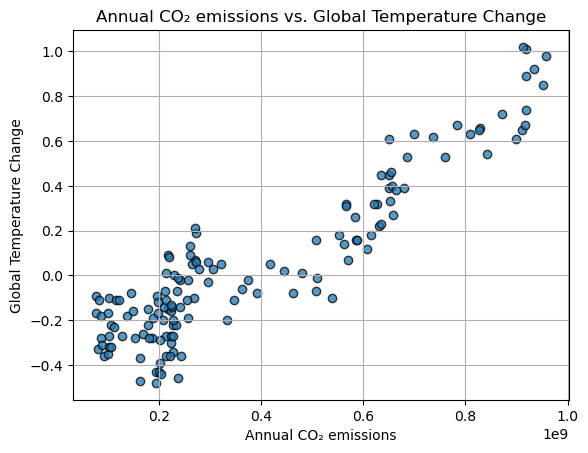

In [90]:
#scatter plot for sea level change vs. global temperatures
plt.scatter(sea_temp_emissions_df['Annual CO₂ emissions'], sea_temp_emissions_df['Global Temperature Change'], edgecolor='black', alpha=0.75)

#graph properties
plt.title("Annual CO₂ emissions vs. Global Temperature Change")
plt.xlabel("Annual CO₂ emissions")
plt.ylabel("Global Temperature Change")
plt.grid()

#save figure
plt.savefig("output_data/Fig8.png")

plt.show

The r^2 value is : 0.8401933903207602


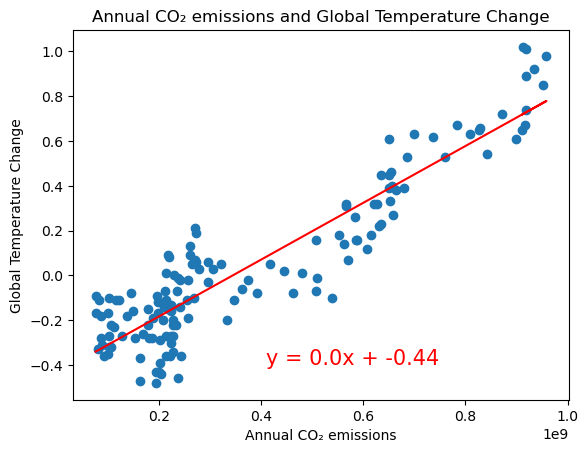

In [100]:
#lineral regression
x_values = sea_temp_emissions_df["Annual CO₂ emissions"]
y_values = sea_temp_emissions_df["Global Temperature Change"]

plt.scatter(x_values, y_values)

regress_values, line_eq, rvalue = linear_regression(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(0.41e9, -0.4),fontsize=15,color='red')
plt.title("Annual CO₂ emissions and Global Temperature Change")
plt.xlabel('Annual CO₂ emissions')
plt.ylabel('Global Temperature Change')

print(f"The r^2 value is : {rvalue**2}")

#save figure
plt.savefig("output_data/Fig9.png")

plt.show()